# Trabalho A1

## Passo 1: escolha da base de dados

Nesse trabalho será utilizada a base de dados **Students Performance in Exams** (desempenho de alunos em exames). Ela está disponível em https://www.kaggle.com/spscientist/students-performance-in-exams.

Essa base de dados foi escolhida por possuir colunas de diversos tipos que permitem uma boa análise exploratória de dados. Além disso, será possível tirar conclusões da influência de alguns fatores nas notas dos alunos.

Essa base de dados possui 1000 registros diferentes e 8 colunas:
- _gender_: gênero sexual
- _race.ethnicity_: raça/etnia
- _parental.level.of.education_: nível de educação dos pais
- _lunch_: almoço
- _test.preparation.course_: curso de preparação para o curso
- _math.score_: nota em matemática
- _reading.score_: nota em leitura
- _writing.score_: nota em escrita

## Passo 2: importar a base para R e limpeza dos dados

A base de dados escolhida não necessita de passar por uma limpeza, já que os dados estão corretamente formatados. 

In [1]:
dados <- read.csv("StudentsPerformance.csv")
head(dados)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


Além disso, também serão utilizadas as bibliotecas do **tidyverse**:

In [2]:
suppressPackageStartupMessages(library("tidyverse"))
options(repr.plot.width=12, repr.plot.height=8)

## Passo 3: análise exploratória

### Unidimensional

Nessa etapa, meu objetivo vai ser análisar unidimensionalmente as variáveis a fim de ter uma visão geral da distribuição dos dados. Aqui, irei utilizar a bilbioteca `ggplot2` para produzir os gráficos e o método `summary` para obter as medidas de resumo das variáveis quantitativas.

Análise da variável categórica _gender_ (gênero sexual):

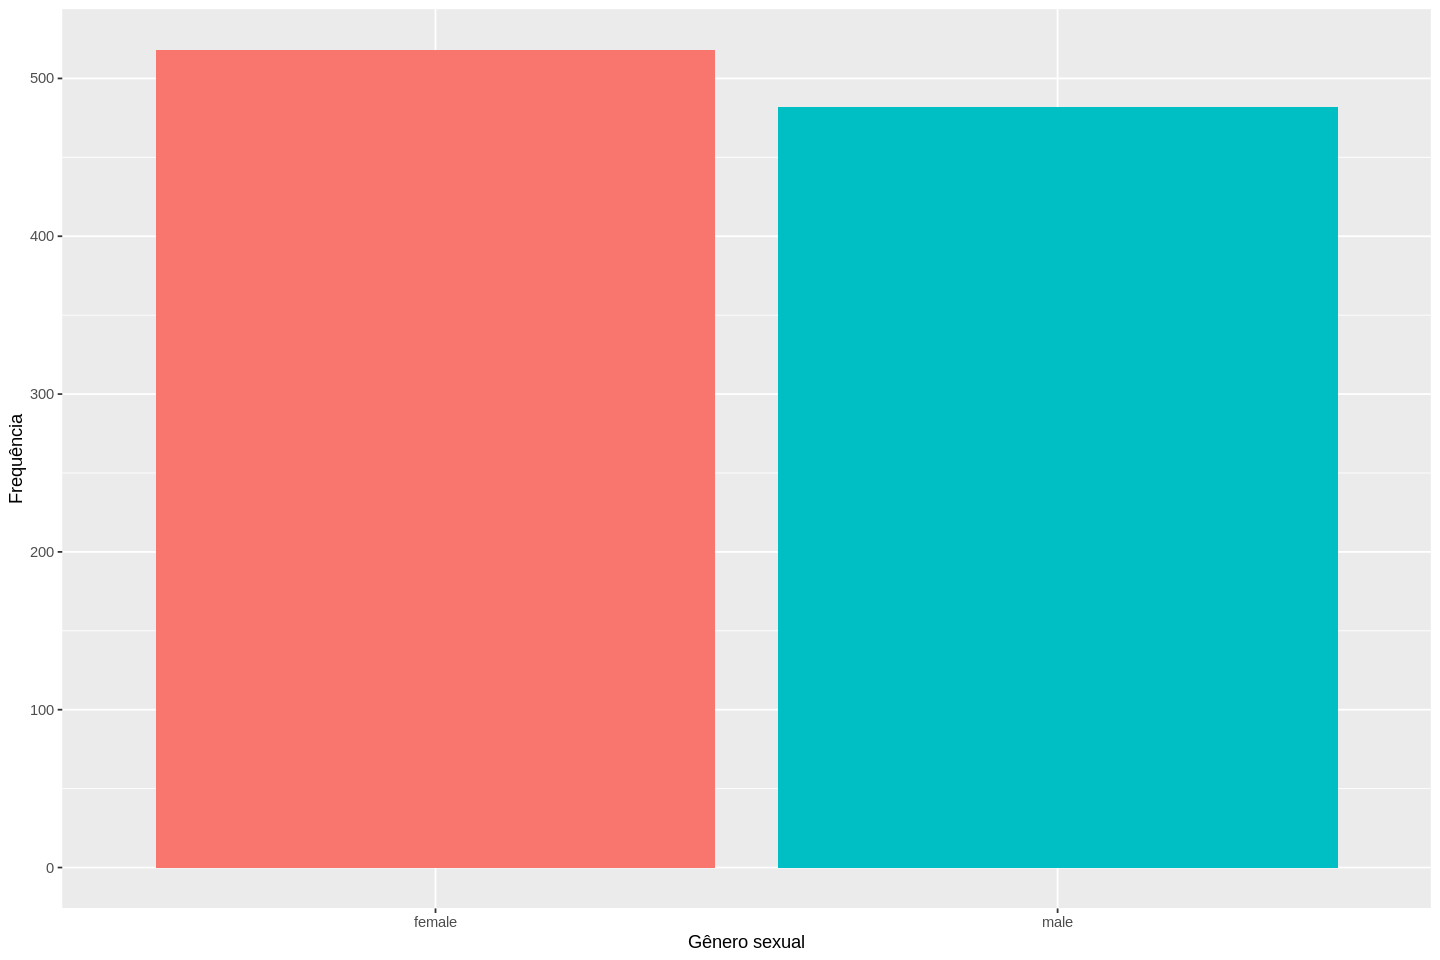

In [5]:
dados %>% ggplot(aes(gender, fill = gender)) + geom_bar(show.legend = F) + xlab("Gênero sexual") + 
    ylab("Frequência")

Análise da variável categórica _test.preparation.course_ (curso de preparação para o teste):

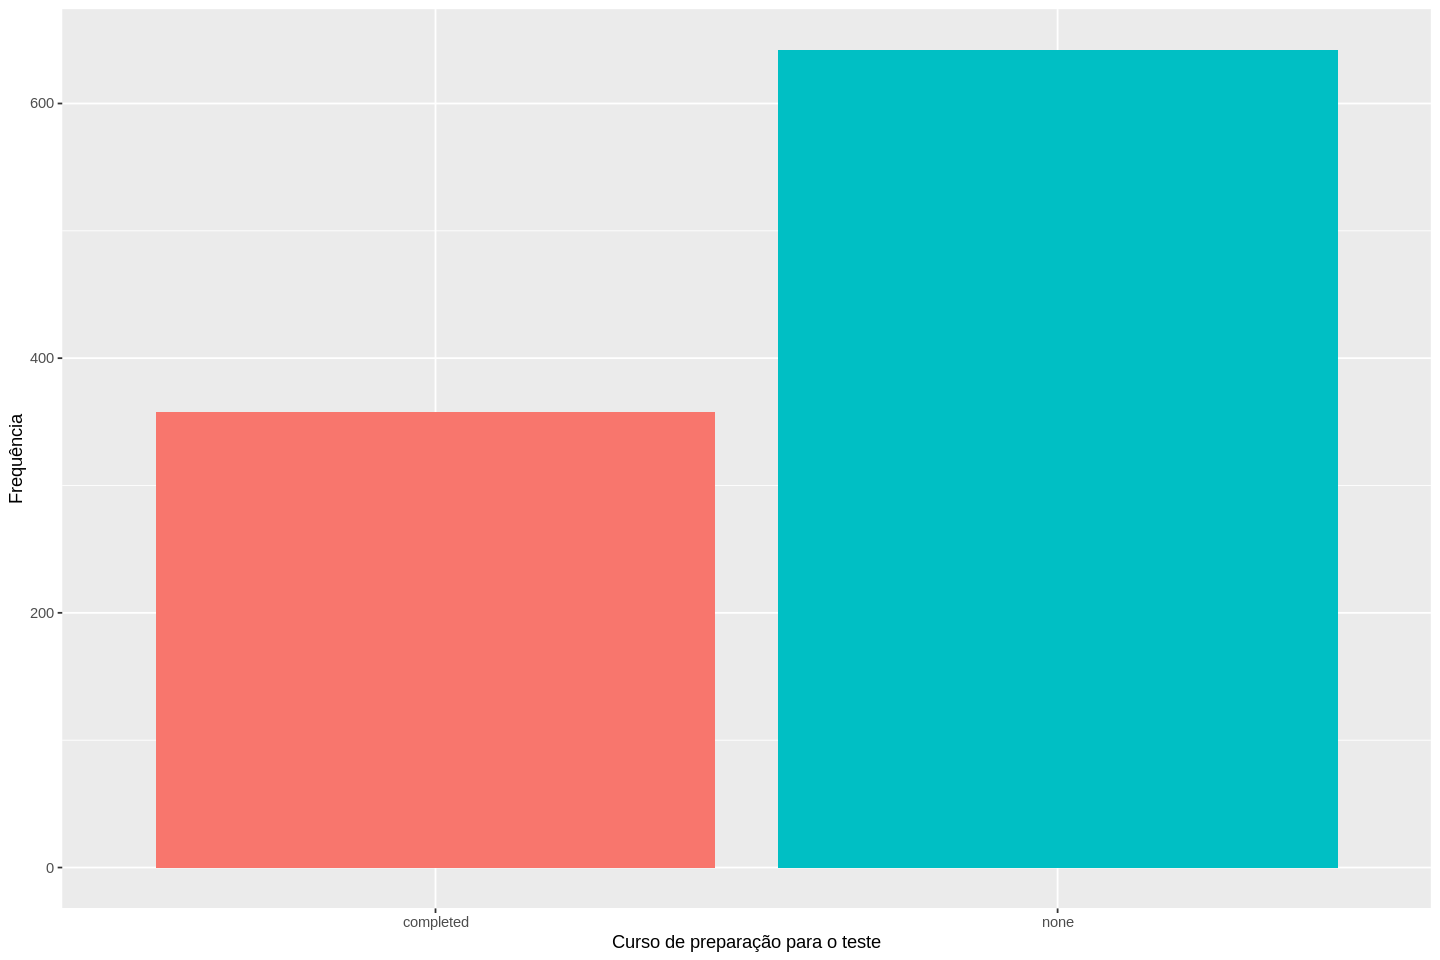

In [4]:
dados %>% ggplot(aes(test.preparation.course, fill = test.preparation.course)) + 
    geom_bar(show.legend = F) + xlab("Curso de preparação para o teste") + ylab("Frequência")

Análise da variável categórica _parental.level.of.education_ (nível de educação dos pais):

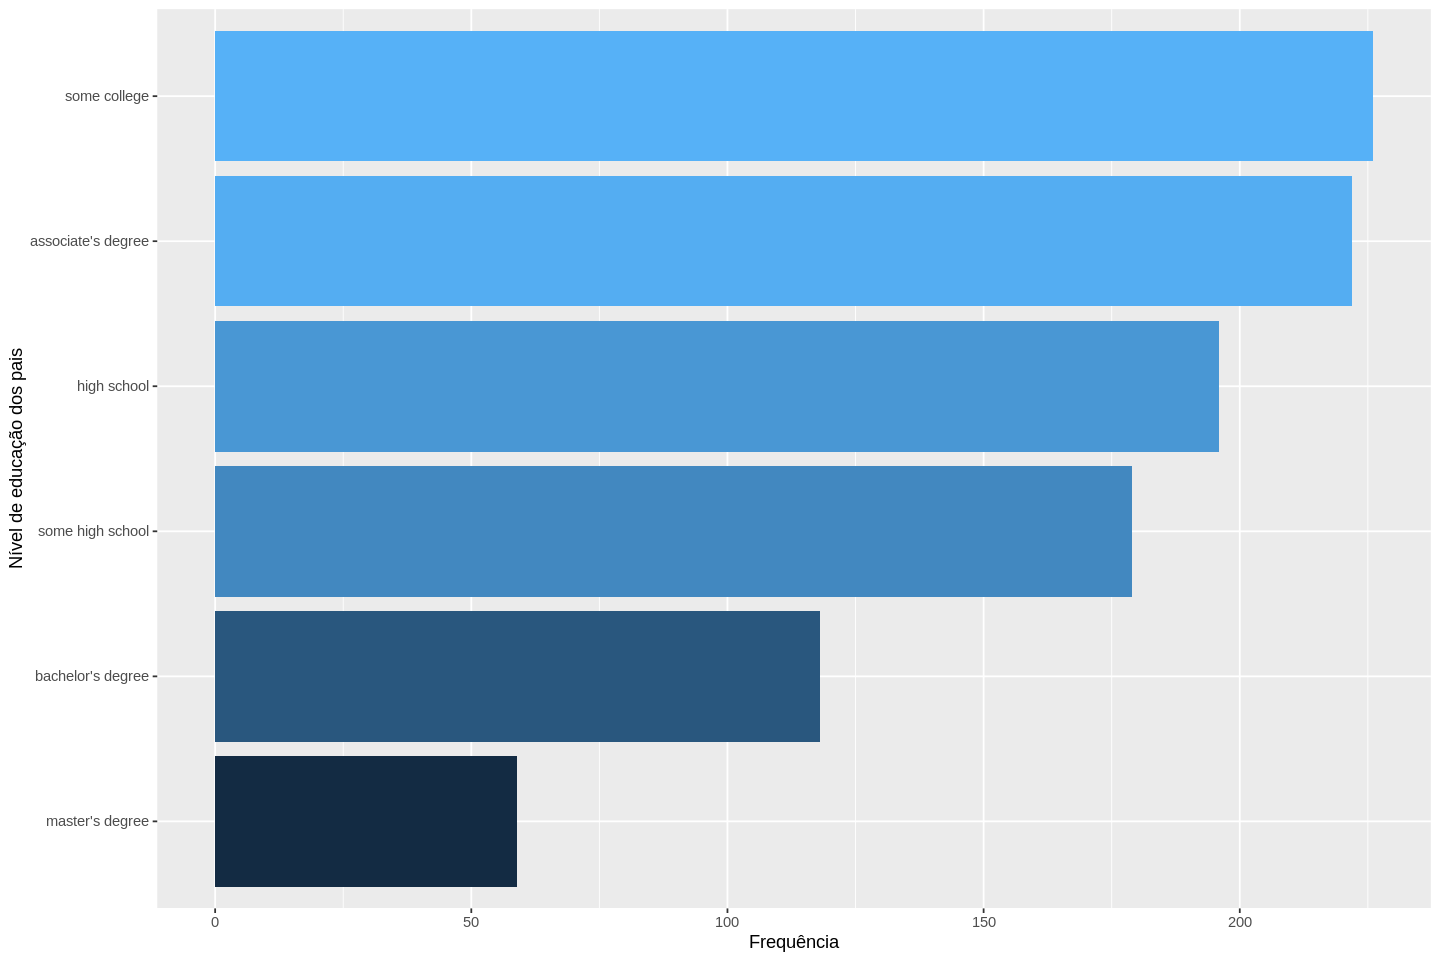

In [33]:
dados %>% ggplot(aes(y = fct_rev(fct_infreq(parental.level.of.education)), fill = ..count..)) + 
    geom_bar(show.legend = F) + xlab("Frequência") + ylab("Nível de educação dos pais")

Análise da variável quantitativa _math.score_ (nota em matemática):

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   57.00   66.00   66.09   77.00  100.00 

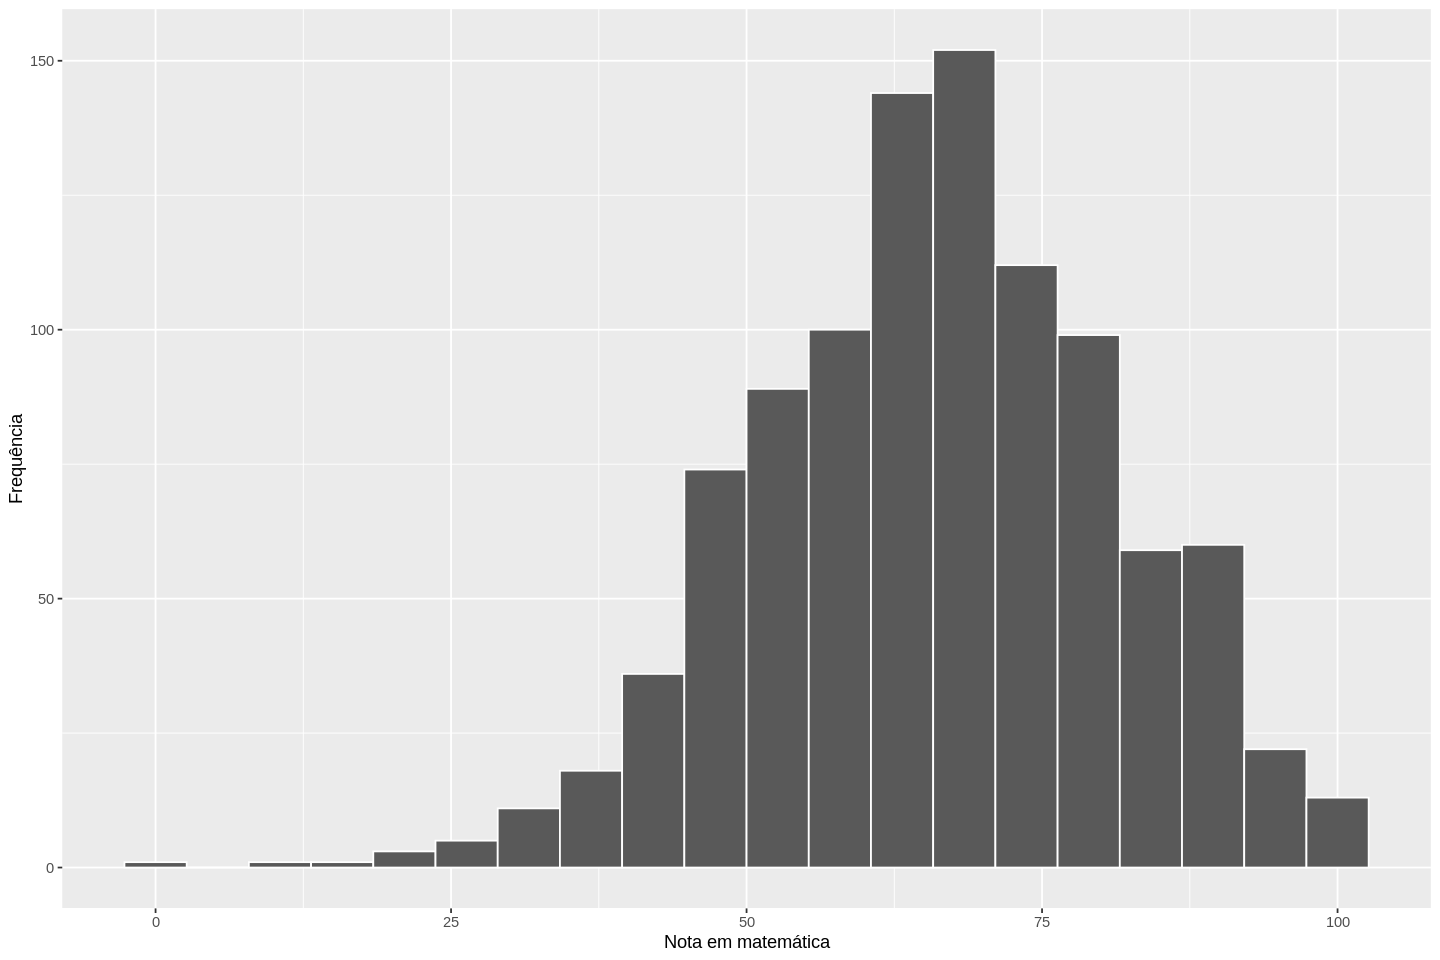

In [23]:
dados %>% pull(math.score) %>% summary()

dados %>% ggplot(aes(math.score)) + geom_histogram(bins = 20, color = "white") + 
    xlab("Nota em matemática") + ylab("Frequência")

Análise da variável quantitativa _reading.score_ (nota em leitura):

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   59.00   70.00   69.17   79.00  100.00 

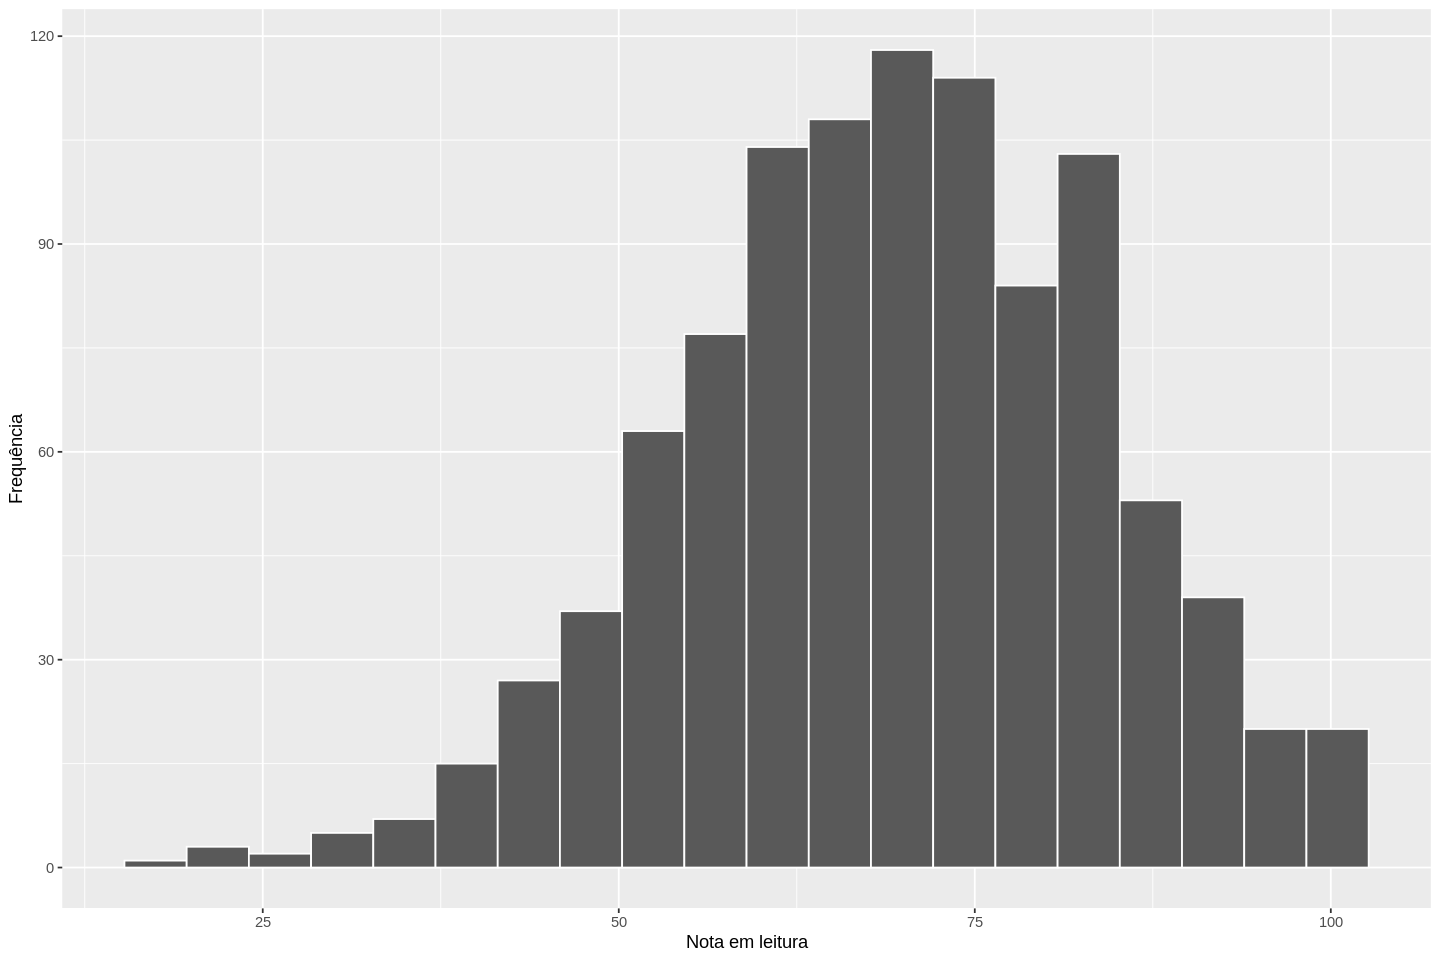

In [26]:
dados %>% pull(reading.score) %>% summary()

dados %>% ggplot(aes(reading.score)) + geom_histogram(bins = 20, color = "white") + 
    xlab("Nota em leitura") + ylab("Frequência")

Análise da variável quantitativa _writing.score_ (nota em escrita):

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   57.75   69.00   68.05   79.00  100.00 

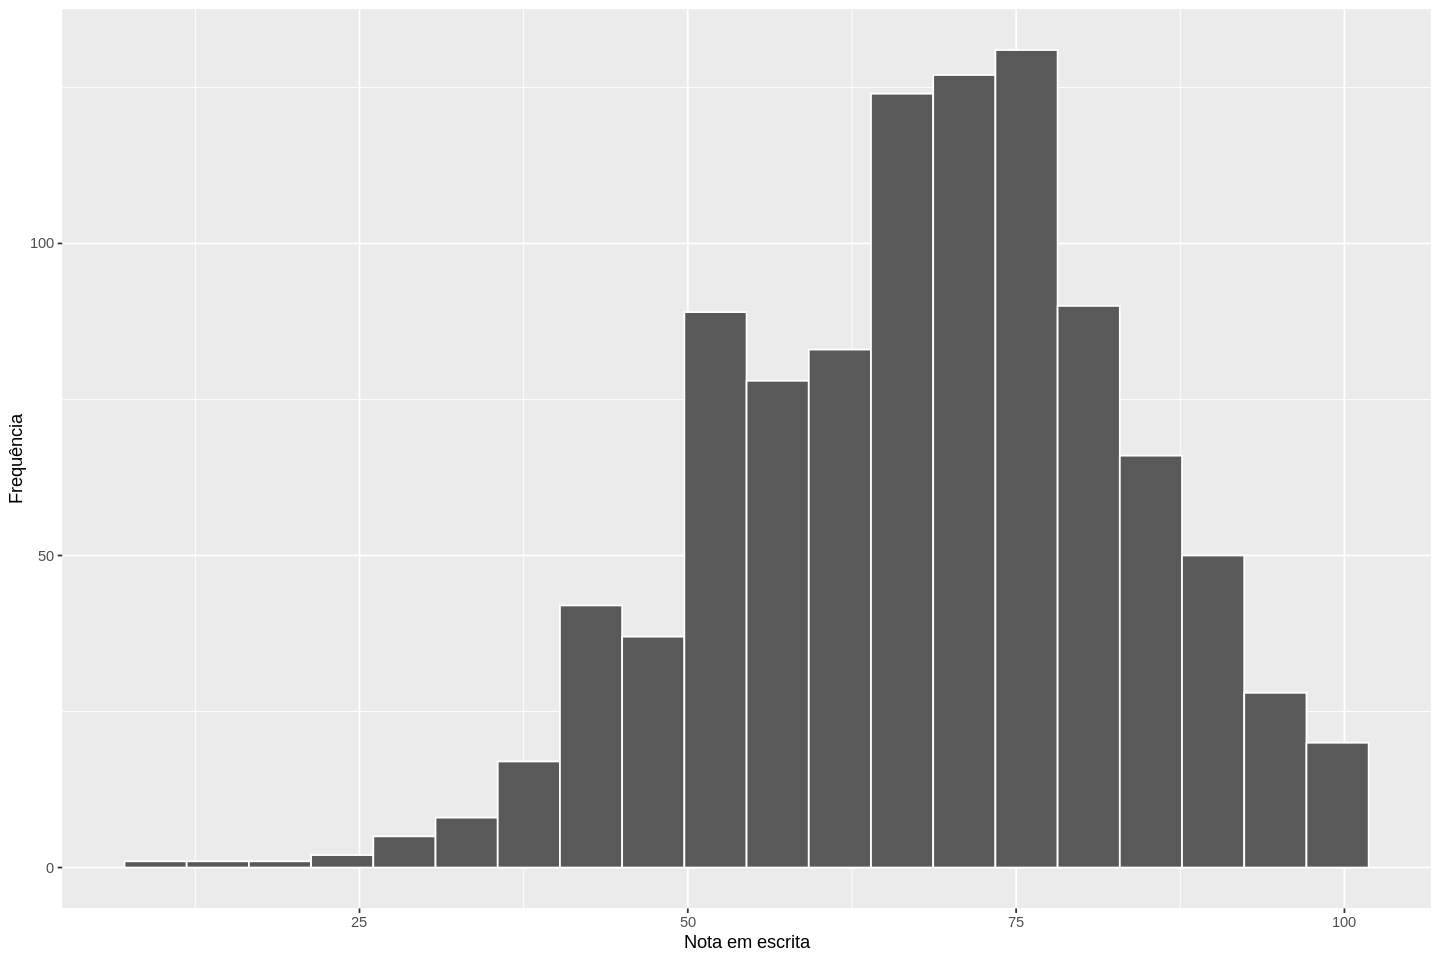

In [27]:
dados %>% pull(writing.score) %>% summary()

dados %>% ggplot(aes(writing.score)) + geom_histogram(bins = 20, color = "white") + 
    xlab("Nota em escrita") + ylab("Frequência")

Depois de obter essas visualizações, eu fiquei curioso de como o curso de preparação para o teste e o nível de educação dos pais influenciaram nas notas dos alunos, e vai ser isso que eu irei tentar visualizar na análise bidimensional.

### Bidimensional

Nessa etapa, eu vou visualizar as relações entre variáveis, e quanto uma influencia a outra.

Análise das variáveis categóricas _parental.level.of.education_ (nível de educação dos pais) e _race.ethnicity_ (raça/etnia):

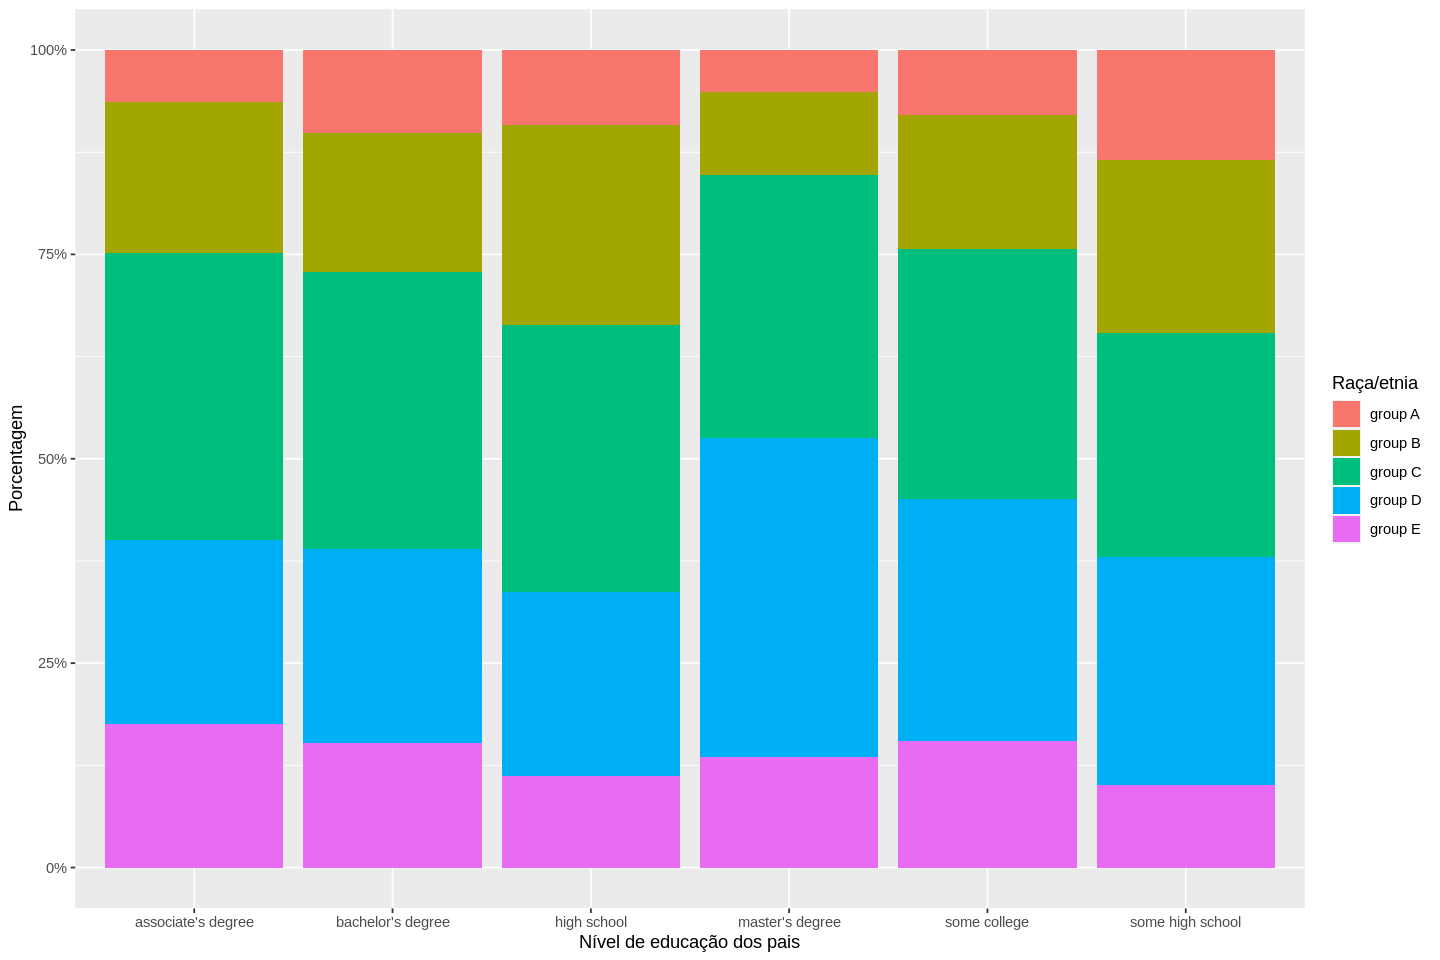

In [93]:
dados %>% ggplot(aes(parental.level.of.education, fill = race.ethnicity)) + geom_bar(position = "fill") + 
    scale_y_continuous(labels = scales::percent_format()) + xlab("Nível de educação dos pais") + 
    ylab("Porcentagem") + labs(fill = "Raça/etnia")

Análise das variáveis quantitativas _reading.score_ (nota em leitura) e _writing.score_ (nota em escrita), separadas de acordo com a variável qualitativa _test.preparation.course_ (curso de preparação para o teste):

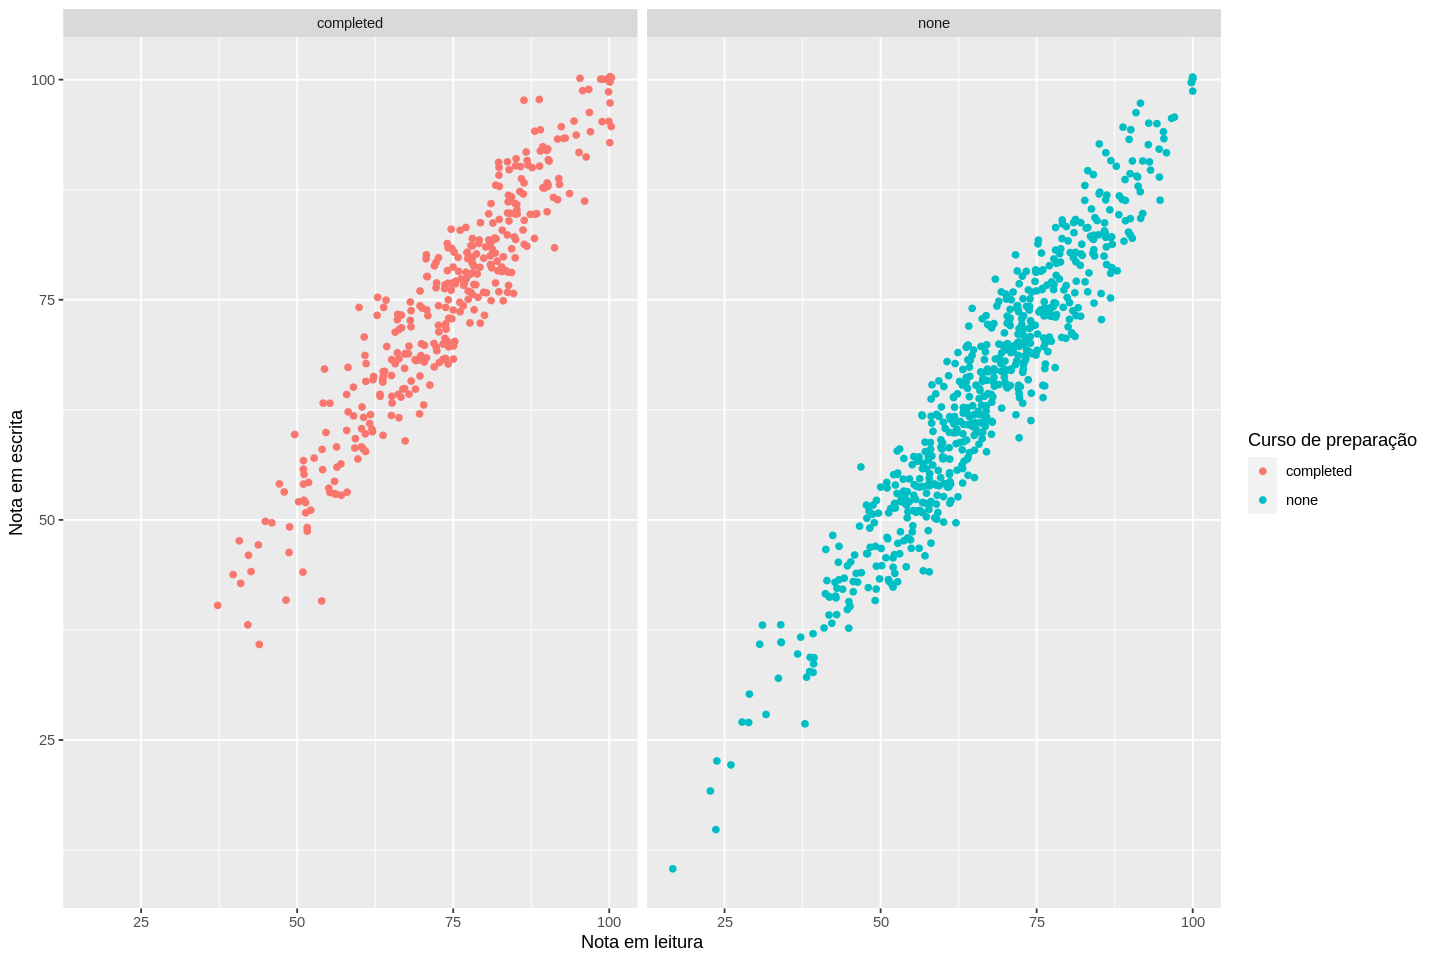

In [74]:
dados %>% ggplot(aes(reading.score, writing.score, color = test.preparation.course)) + 
    geom_jitter() + facet_wrap(~test.preparation.course) + xlab("Nota em leitura") + 
    ylab("Nota em escrita") + labs(color = "Curso de preparação")

Análise da variável categórica _parental.level.of.education_ (nível de educação dos pais) e da variável quantitativa _math.score_ (nota em matemática), separadas de acordo com a variável categórica test.preparation.course (curso de preparação para o teste):

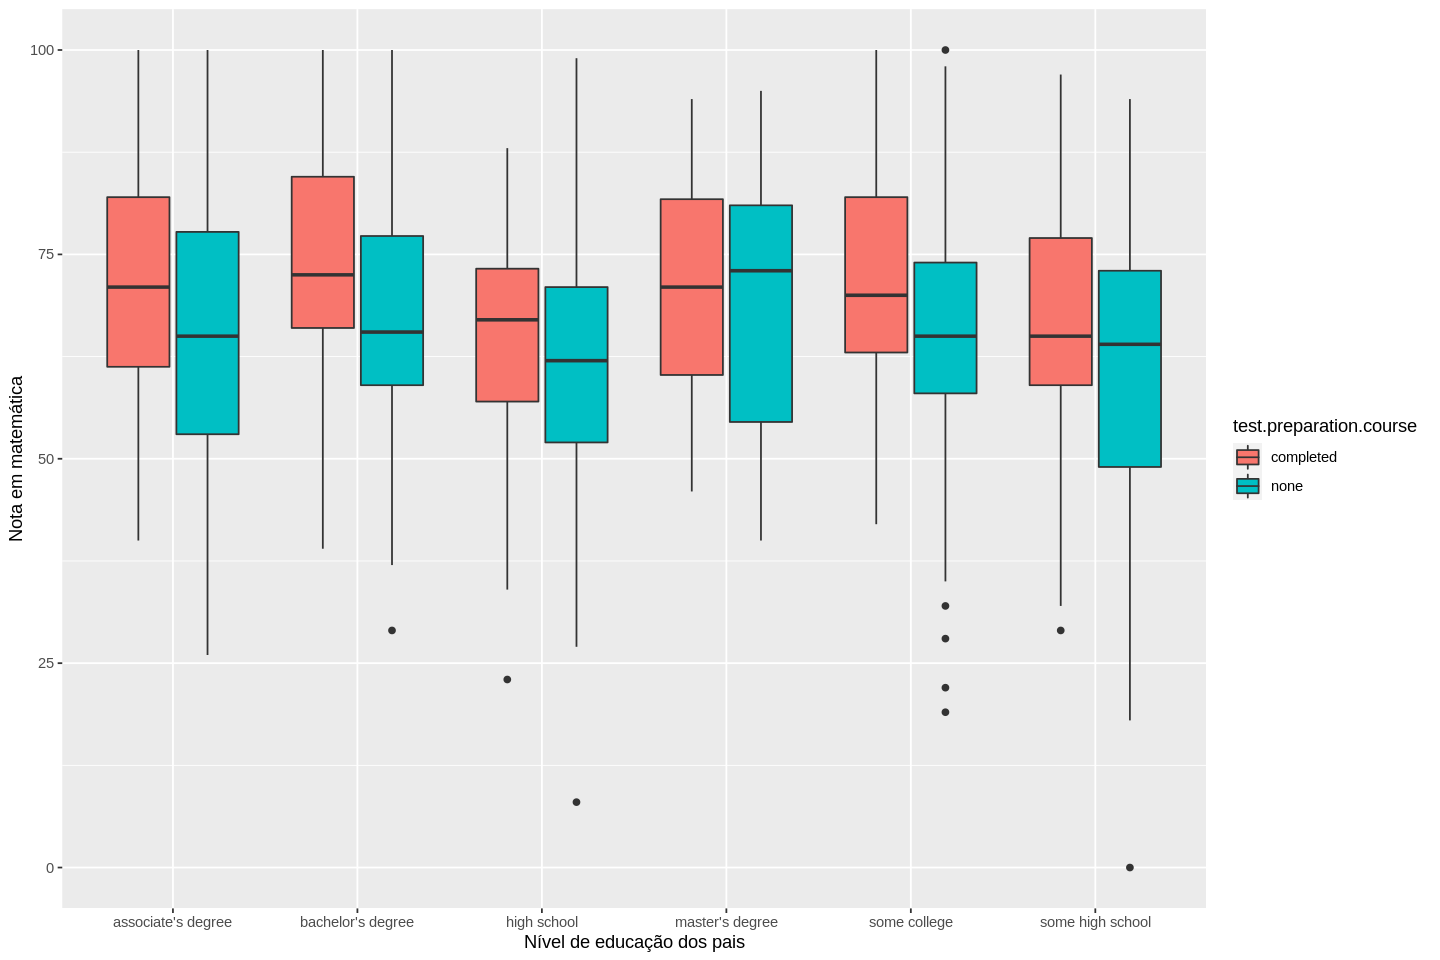

In [47]:
dados %>% ggplot(aes(parental.level.of.education, math.score, fill = test.preparation.course)) + 
    geom_boxplot() + xlab("Nível de educação dos pais") + ylab("Nota em matemática")

Resumo dos dados de nota para aqueles que **não completaram** o curso de preparação para o teste:

In [81]:
dados %>% filter(test.preparation.course == "none") %>% select(contains("score")) %>% 
    summary()

   math.score     reading.score    writing.score  
 Min.   :  0.00   Min.   : 17.00   Min.   : 10.0  
 1st Qu.: 54.00   1st Qu.: 57.00   1st Qu.: 54.0  
 Median : 64.00   Median : 67.00   Median : 65.0  
 Mean   : 64.08   Mean   : 66.53   Mean   : 64.5  
 3rd Qu.: 74.75   3rd Qu.: 76.00   3rd Qu.: 74.0  
 Max.   :100.00   Max.   :100.00   Max.   :100.0  

Resumo dos dados de nota para aqueles que **completaram** o curso de preparação para o teste:

In [78]:
dados %>% filter(test.preparation.course == "completed") %>% select(contains("score")) %>% 
    summary()

   math.score    reading.score    writing.score   
 Min.   : 23.0   Min.   : 37.00   Min.   : 36.00  
 1st Qu.: 60.0   1st Qu.: 65.00   1st Qu.: 66.00  
 Median : 69.0   Median : 75.00   Median : 76.00  
 Mean   : 69.7   Mean   : 73.89   Mean   : 74.42  
 3rd Qu.: 79.0   3rd Qu.: 84.00   3rd Qu.: 83.00  
 Max.   :100.0   Max.   :100.00   Max.   :100.00  

Gráfico de simetria da variável quantitativa _writing.score_ (nota em escrita):

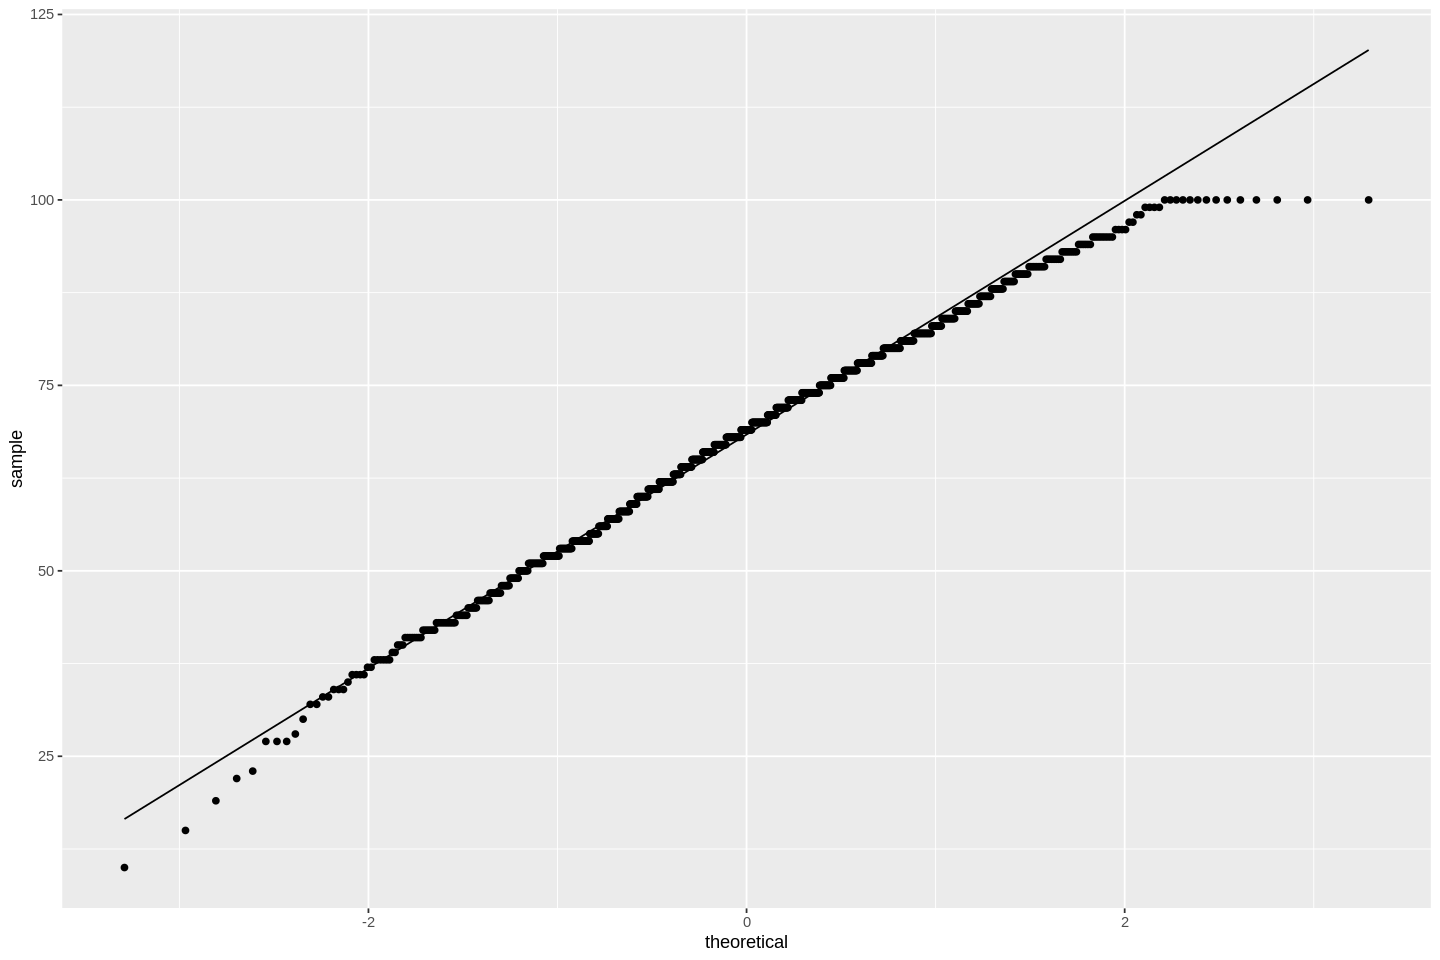

In [40]:
dados %>% ggplot(aes(sample=writing.score)) + stat_qq() + stat_qq_line()

Gráfico de quantil x quantil da variável quantitativas _math.score_ (nota em matemática) e _reading.score_ (nota em leitura):

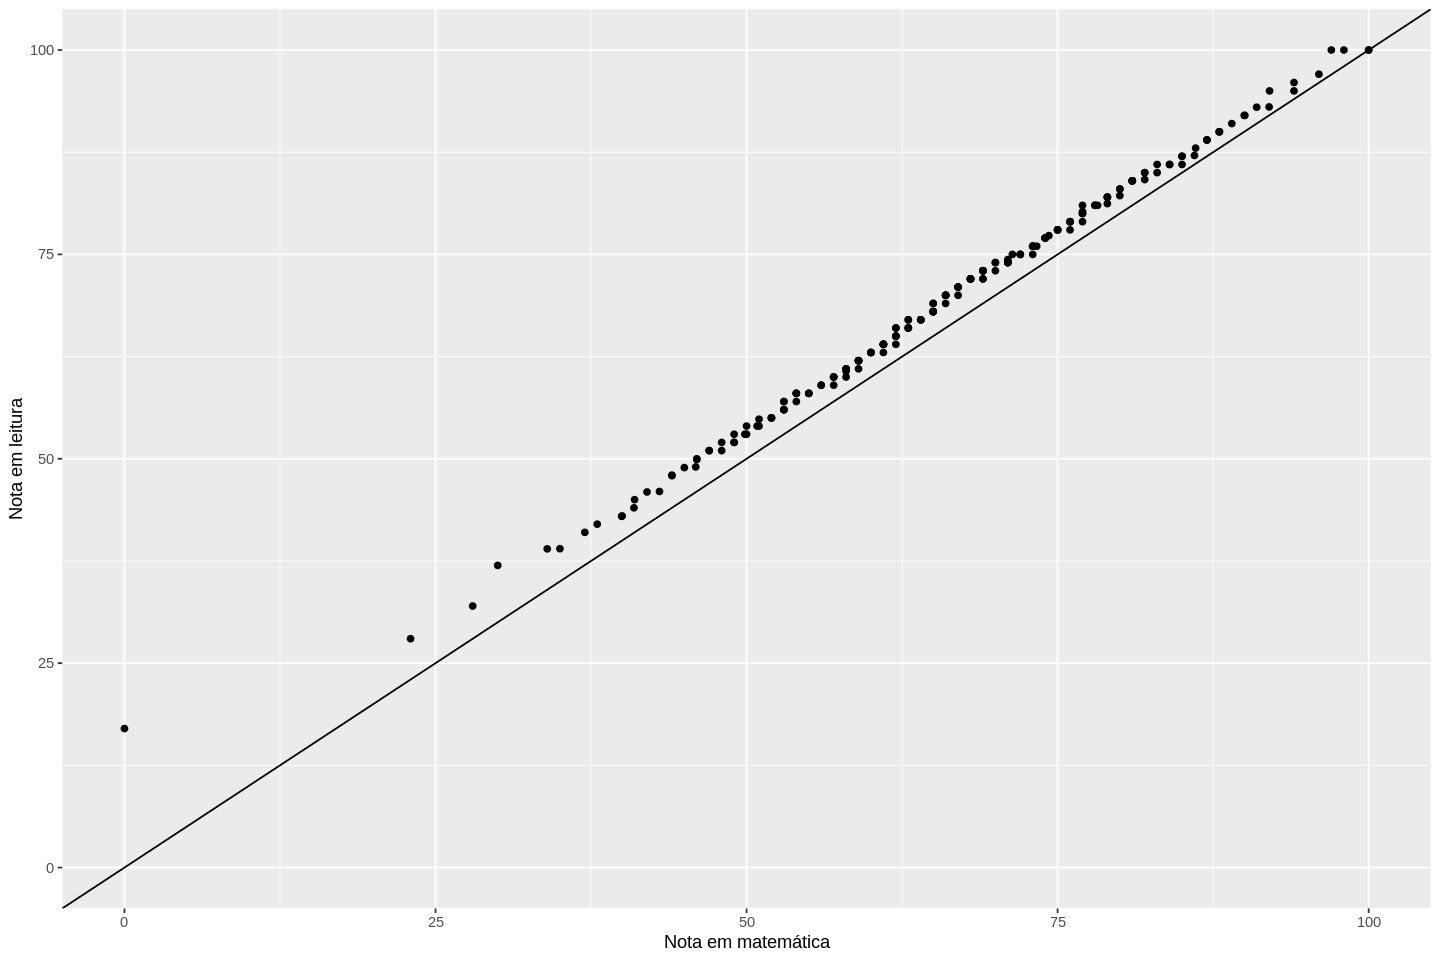

In [45]:
quantis <- tibble(math = dados %>% pull(math.score) %>% quantile(probs = seq(0, 1, 
    0.005)), reading = dados %>% pull(reading.score) %>% quantile(probs = seq(0, 
    1, 0.005)))

quantis %>% ggplot(aes(math, reading)) + geom_point() + geom_abline(slope = 1) + 
    xlim(0, 100) + ylim(0, 100) + xlab("Nota em matemática") + ylab("Nota em leitura")

## Passo 4: comentários e conclusão

### Conclusões sobre a visualização dos dados

Durante a análise unidimensional, eu observei que algumas variáveis possivelmente tinham influência nas notas dos alunos, como é o caso do curso de preparação para o teste. Segundo os gráficos produzidos, os alunos que fizeram esse curso tiraram notas baixas menos vezes. Isso foi confirmado pelas medidas de resumo posteriormente na análise: o 1º quartil teve um salto de 6 a 12 pontos em todas as notas dos alunos que completaram o tal curso.

Além disso, também foi possível notar a relação entre as notas de um mesmo aluno: aquele que tira uma certa nota em uma determinada matéria tem uma possibilidade muito maior de tirar uma nota tão boa quanto nas outras.

### Bibliotecas e ferramentas utilizadas

Aqui eu utilizei as principais bibliotecas do tidyverse:
- `ggplot2`: produção de gráficos
- `dplyr`: manipulação de dados
- `forcats`: manipulação de variáveis categóricas

Aleḿ disso, eu utilizei a biblioteca `scales` para trabalhar com porcentagens.

Todas as bilbiotecas foram bastante úteis, mas destaco a `dplyr`, que oferece uma estrutura bem parecida de uma linguagem SQL, e a `ggplot2`, que possui muitas opções para a produção dos gráficos.

### Meu aprendizado com o trabalho

Nesse trabalho eu me entreti bastante pensando nas diversas possibilidades de visualização de dados que eu poderia fazer. No entanto, me contentei em analizar mais profundamente a relação entre as notas dos alunos com a realização ou não do curso de preparação para o teste. Com isso, consegui aprender bastante como eu começaria a trabalhar com uma base de dados real, montando os primeiros gráficos para uma visualização geral das informações.